In [1]:
%matplotlib inline
import activ
import h5py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [6]:
path = "../results/bootstrapped_clustering/bootstrapped.h5"

In [30]:
def bootstrap_plot(path, reg=False, blobs=None, ax=None):
    f = h5py.File(path, mode='r')
    try:
        labels = f['labels'][:]
        preds = f['preds'][:]
        rlabels = f['rlabels'][:]
        rpreds = f['rpreds'][:]
        cluster_sizes = f['cluster_sizes'][:]
    finally:
        f.close()

    n_bootstraps = labels.shape[0]
    n_cluster_sizes = labels.shape[2]
    accuracy = np.zeros((n_cluster_sizes, n_bootstraps))
    chance = np.zeros((n_cluster_sizes, n_bootstraps))
    
    for boot in range(n_bootstraps):
        for cl in range(n_cluster_sizes):
            sl = np.s_[boot, :, cl]
            accuracy[cl, boot] = accuracy_score(labels[sl], preds[sl])
            chance[cl, boot] = accuracy_score(rlabels[sl], rpreds[sl])
    foc = accuracy/chance
    
    accuracy_lower = np.percentile(accuracy, 25, axis=1)
    accuracy_med = np.percentile(accuracy, 50, axis=1)
    accuracy_upper = np.percentile(accuracy, 75, axis=1)

    chance_lower = np.percentile(chance, 25, axis=1)
    chance_med = np.percentile(chance, 50, axis=1)
    chance_upper = np.percentile(chance, 75, axis=1)

    foc_lower = np.percentile(foc, 25, axis=1)
    foc_med = np.percentile(foc, 50, axis=1)
    foc_upper = np.percentile(foc, 75, axis=1)

    if reg==True:
        fig = plt.figure(figsize=[10,10])
        plt.errorbar(cluster_sizes, foc_med, yerr=[foc_med-foc_lower,foc_upper-foc_med], color = 'red',fmt='-o', label='Fold over chance')
        plt.title("Sim {} Blobs".format(blobs), fontsize=20)
        plt.xlabel("Cluster sizes")
        plt.ylabel("Fold over chance")
        plt.title("Sim Reg Data", fontsize=20)
    else:
        ax.errorbar(cluster_sizes, foc_med, yerr=[foc_med-foc_lower,foc_upper-foc_med], color = 'red',fmt='-o', label='Fold over chance')
        ax.set_title("Sim {} Blobs".format(blobs), fontsize=20)
        ax.set_xlabel("Cluster sizes")
        ax.set_ylabel("Fold over chance")

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


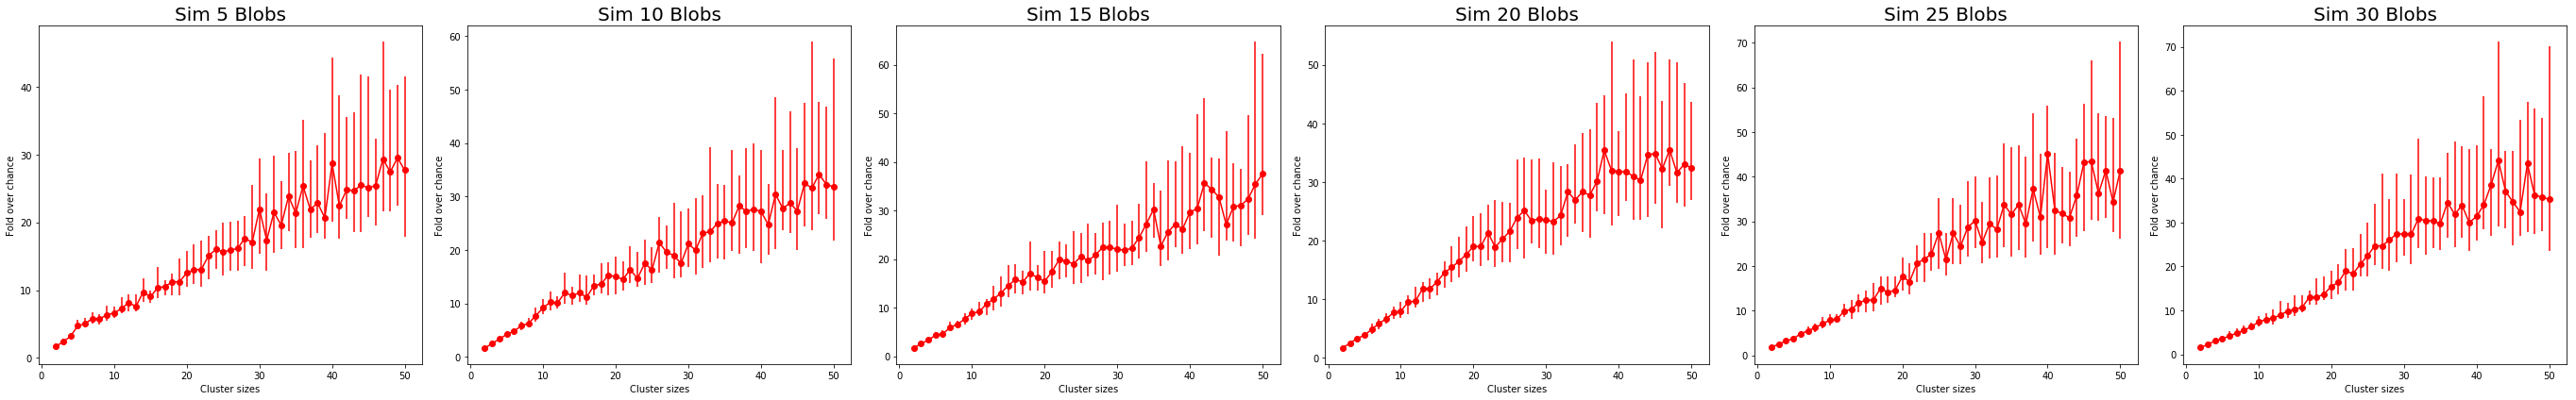

In [32]:
num = [5,10,15,20,25,30]
f, axes = plt.subplots(1, 6, figsize=(38,6))
for j,n in zip(range(6), num):
    bootstrap_plot('/Users/ahyeon/Desktop/activ_misc/bootstrap_sim{}_results.h5'.format(n), blobs=n, ax=axes[j])
f.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ_misc/bootstrap_sim_data.png', dpi=300)

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


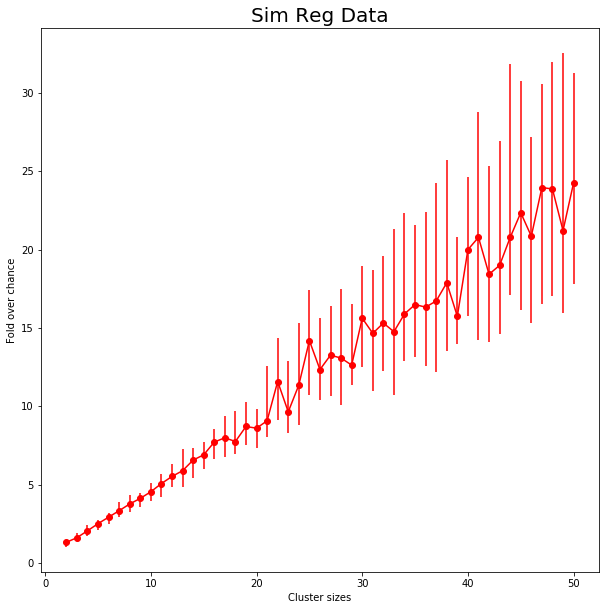

In [33]:
bootstrap_plot('/Users/ahyeon/Desktop/activ_misc/bootstrap_reg_results.h5', reg=True)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/bootstrap_reg_data.png', dpi=300)

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


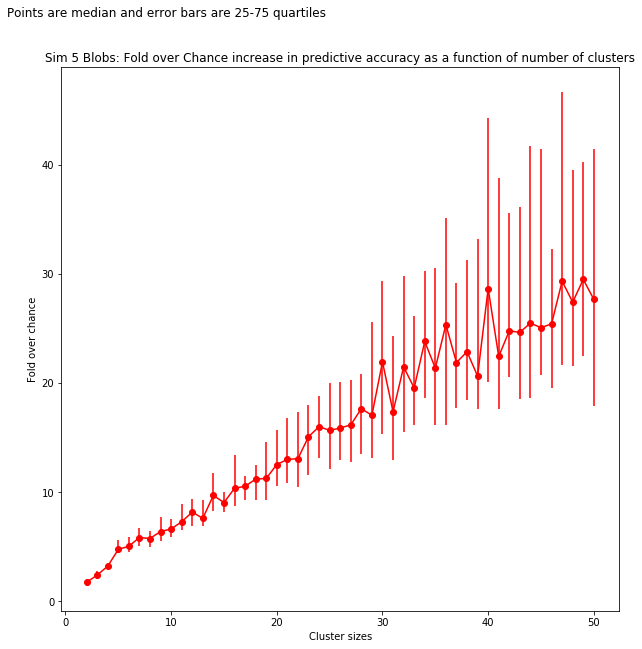

In [16]:
bootstrap_plot('/Users/ahyeon/Desktop/activ_misc/sim_5_centers_bootstrap_results.h5', 5)

In [5]:
f = h5py.File(sim_3_path, mode='r')
try:
    labels = f['labels'][:]
    preds = f['preds'][:]
    rlabels = f['rlabels'][:]
    rpreds = f['rpreds'][:]
    cluster_sizes = f['cluster_sizes'][:]
finally:
    f.close()

n_bootstraps = labels.shape[0]
n_cluster_sizes = labels.shape[2]
accuracy = np.zeros((n_cluster_sizes, n_bootstraps))
chance = np.zeros((n_cluster_sizes, n_bootstraps))

In [6]:
for boot in range(n_bootstraps):
    for cl in range(n_cluster_sizes):
        sl = np.s_[boot, :, cl]
        accuracy[cl, boot] = accuracy_score(labels[sl], preds[sl])
        chance[cl, boot] = accuracy_score(rlabels[sl], rpreds[sl])
foc = accuracy/chance

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [7]:
accuracy_lower = np.percentile(accuracy, 25, axis=1)
accuracy_med = np.percentile(accuracy, 50, axis=1)
accuracy_upper = np.percentile(accuracy, 75, axis=1)

chance_lower = np.percentile(chance, 25, axis=1)
chance_med = np.percentile(chance, 50, axis=1)
chance_upper = np.percentile(chance, 75, axis=1)

foc_lower = np.percentile(foc, 25, axis=1)
foc_med = np.percentile(foc, 50, axis=1)
foc_upper = np.percentile(foc, 75, axis=1)

Text(0, 0.5, 'Fold over chance')

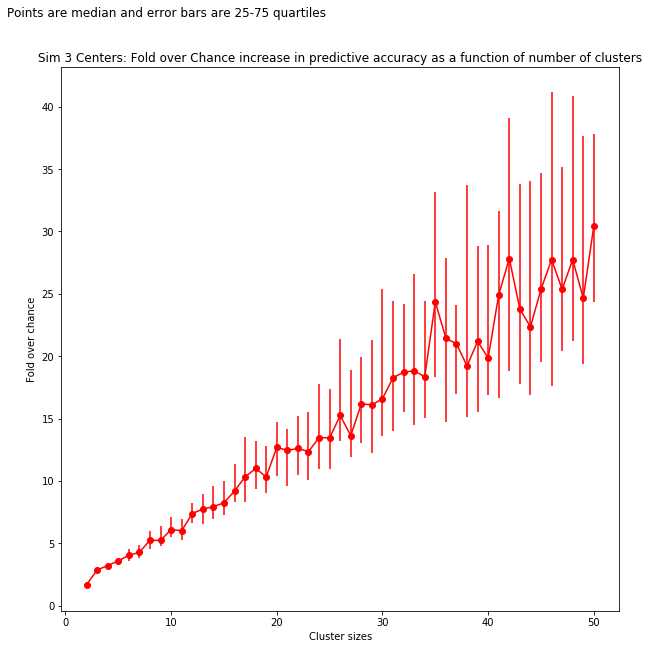

In [8]:
fig = plt.figure(figsize=[10,10])
#plt.ylim((1, 4.5))
plt.errorbar(cluster_sizes, foc_med, yerr=[foc_med-foc_lower,foc_upper-foc_med], color = 'red',fmt='-o', label='Fold over chance')
plt.title("Sim 3 Centers: Fold over Chance increase in predictive accuracy as a function of number of clusters")
txt = "Points are median and error bars are 25-75 quartiles"
plt.text(0.05,0.95,txt, transform=fig.transFigure, size=12)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")

Text(0.05,0.95,'Points are median and error bars are 25-75 quartiles')

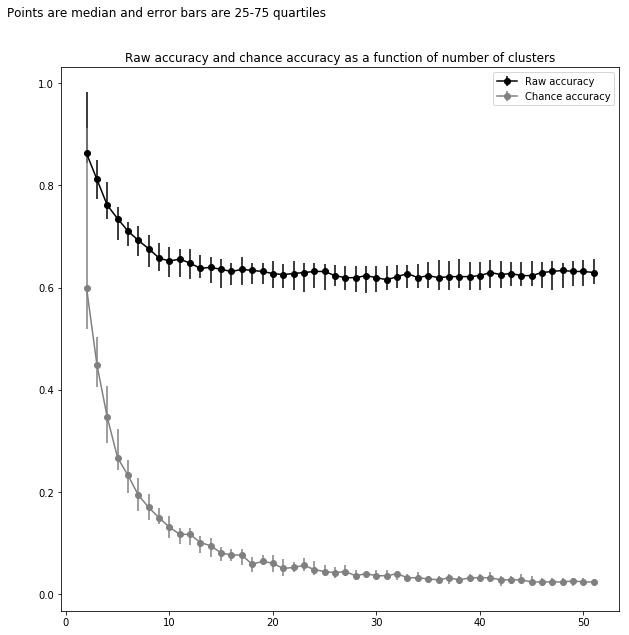

In [34]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(cluster_sizes, accuracy_med, yerr=[accuracy_med-accuracy_lower,accuracy_upper-accuracy_med], color='black',fmt='-o', label='Raw accuracy')
plt.errorbar(cluster_sizes, chance_med, yerr=[chance_med-chance_lower, chance_upper-chance_med], color='grey',fmt='-o', label='Chance accuracy')
plt.legend()
plt.title("Raw accuracy and chance accuracy as a function of number of clusters")
txt = "Points are median and error bars are 25-75 quartiles"
plt.text(0.05,0.95,txt, transform=fig.transFigure, size=12)

In [39]:

accuracy_iqr = (accuracy_upper - accuracy_lower) / accuracy_med
chance_iqr = (chance_upper - chance_lower) / chance_med
foc_iqr = (foc_upper - foc_lower) / foc_med

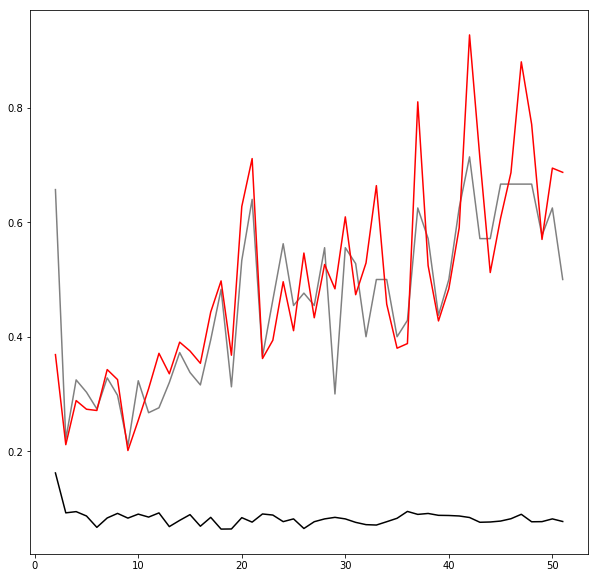

In [41]:
fig = plt.figure(figsize=[10,10])
plt.plot(cluster_sizes, accuracy_iqr, color='black')
plt.plot(cluster_sizes, chance_iqr, color='gray')
plt.plot(cluster_sizes, foc_iqr, color='red')

In [ ]:
h